In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plta

In [ ]:
df = pd.read_csv('activation_diff_results2.csv')

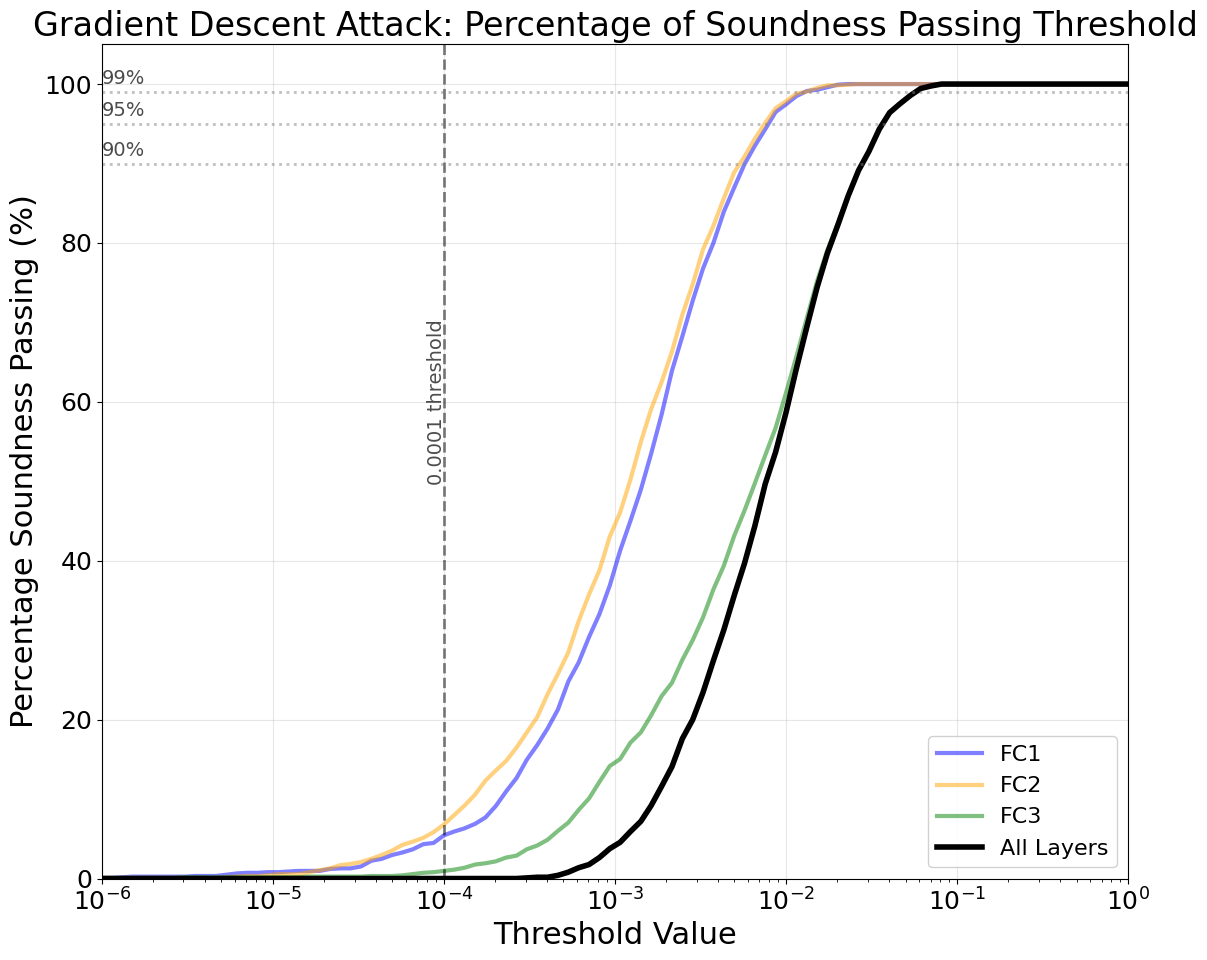


Percentage passing at key thresholds:

Threshold = 0.0001:
--------------------------------------------------
  FC1: 5.4%
  FC2: 6.8%
  FC3: 1.0%
  All Layers: 0.0%

Threshold = 0.001:
--------------------------------------------------
  FC1: 38.8%
  FC2: 44.6%
  FC3: 14.6%
  All Layers: 4.1%

Threshold = 0.01:
--------------------------------------------------
  FC1: 97.4%
  FC2: 97.8%
  FC3: 61.1%
  All Layers: 58.6%

Threshold = 0.1:
--------------------------------------------------
  FC1: 100.0%
  FC2: 100.0%
  FC3: 100.0%
  All Layers: 100.0%


In [ ]:
# Set global font size
plt.rcParams.update({'font.size': 20})

# Define threshold values to test
thresholds = np.logspace(-6, 0, 100)  # From 1e-6 to 1 (0.000001 to 1)

# Create single plot figure
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Define layers
layers = ['fc1', 'fc2', 'fc3']

# Define colors for each layer
layer_colors = {
    'fc1': 'blue',
    'fc2': 'orange', 
    'fc3': 'green'
}

# Define layer alphas for visual distinction
layer_alphas = {'fc1': 0.5, 'fc2': 0.5, 'fc3': 0.5}

# Plot minimum values for each layer
for layer in layers:
    column = f'{layer}_min_abs_diff'
    values = df[column].values
    
    # Calculate percentage passing each threshold
    percentages = []
    for threshold in thresholds:
        passing = np.sum(values <= threshold) / len(values) * 100
        percentages.append(passing)
    
    # Plot cumulative distribution
    ax.semilogx(thresholds, percentages, 
               label=f'{layer.upper()}',
               color=layer_colors[layer],
               linewidth=3, 
               alpha=layer_alphas[layer])

# Plot the all-layers line (worst case - ALL layers must pass)
percentages_all = []
for threshold in thresholds:
    passing_count = 0
    for idx in df.index:
        row = df.loc[idx]
        # Check if all layers pass for this sample
        all_pass = True
        for layer in layers:
            if row[f'{layer}_min_abs_diff'] > threshold:
                all_pass = False
                break
        if all_pass:
            passing_count += 1
    
    percentage = (passing_count / len(df)) * 100
    percentages_all.append(percentage)

ax.semilogx(thresholds, percentages_all, 
           label='All Layers',
           color='black',
           linewidth=4,
           alpha=1.0)

# Add reference lines
ax.axvline(x=0.0001, color='black', linestyle='--', alpha=0.5, linewidth=2)
ax.axhline(y=90, color='gray', linestyle=':', alpha=0.5, linewidth=2)
ax.axhline(y=95, color='gray', linestyle=':', alpha=0.5, linewidth=2)
ax.axhline(y=99, color='gray', linestyle=':', alpha=0.5, linewidth=2)

# Add text labels
ax.text(0.00008, 50, '0.0001 threshold', rotation=90, fontsize=14, alpha=0.7)
ax.text(1e-6, 91, '90%', fontsize=14, alpha=0.7)
ax.text(1e-6, 96, '95%', fontsize=14, alpha=0.7)
ax.text(1e-6, 100, '99%', fontsize=14, alpha=0.7)

ax.set_xlabel('Threshold Value', fontsize=22)
ax.set_ylabel('Percentage Soundness Passing (%)', fontsize=22)
ax.set_title('Gradient Descent Attack: Percentage of Soundness Passing Threshold', fontsize=24)

# Create legend
ax.legend(fontsize=16, 
          loc='lower right',
          framealpha=0.9)

ax.grid(True, alpha=0.3)
ax.set_ylim(0, 105)
ax.set_xlim(1e-6, 1)
ax.tick_params(axis='both', which='major', labelsize=18)

plt.tight_layout()
plt.savefig('cumulative_threshold_gd_attack.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics at key thresholds
print("\nPercentage passing at key thresholds:")
print("=" * 70)
key_thresholds = [0.0001, 0.001, 0.01, 0.1]

for threshold in key_thresholds:
    print(f"\nThreshold = {threshold}:")
    print("-" * 50)
    
    for layer in layers:
        column = f'{layer}_min_abs_diff'
        values = df[column].values
        percentage = np.sum(values <= threshold) / len(values) * 100
        print(f"  {layer.upper()}: {percentage:.1f}%")
    
    # All layers simultaneous
    passing_count = 0
    for idx in df.index:
        row = df.loc[idx]
        all_pass = all(row[f'{layer}_min_abs_diff'] <= threshold for layer in layers)
        if all_pass:
            passing_count += 1
    percentage = (passing_count / len(df)) * 100
    print(f"  All Layers: {percentage:.1f}%")


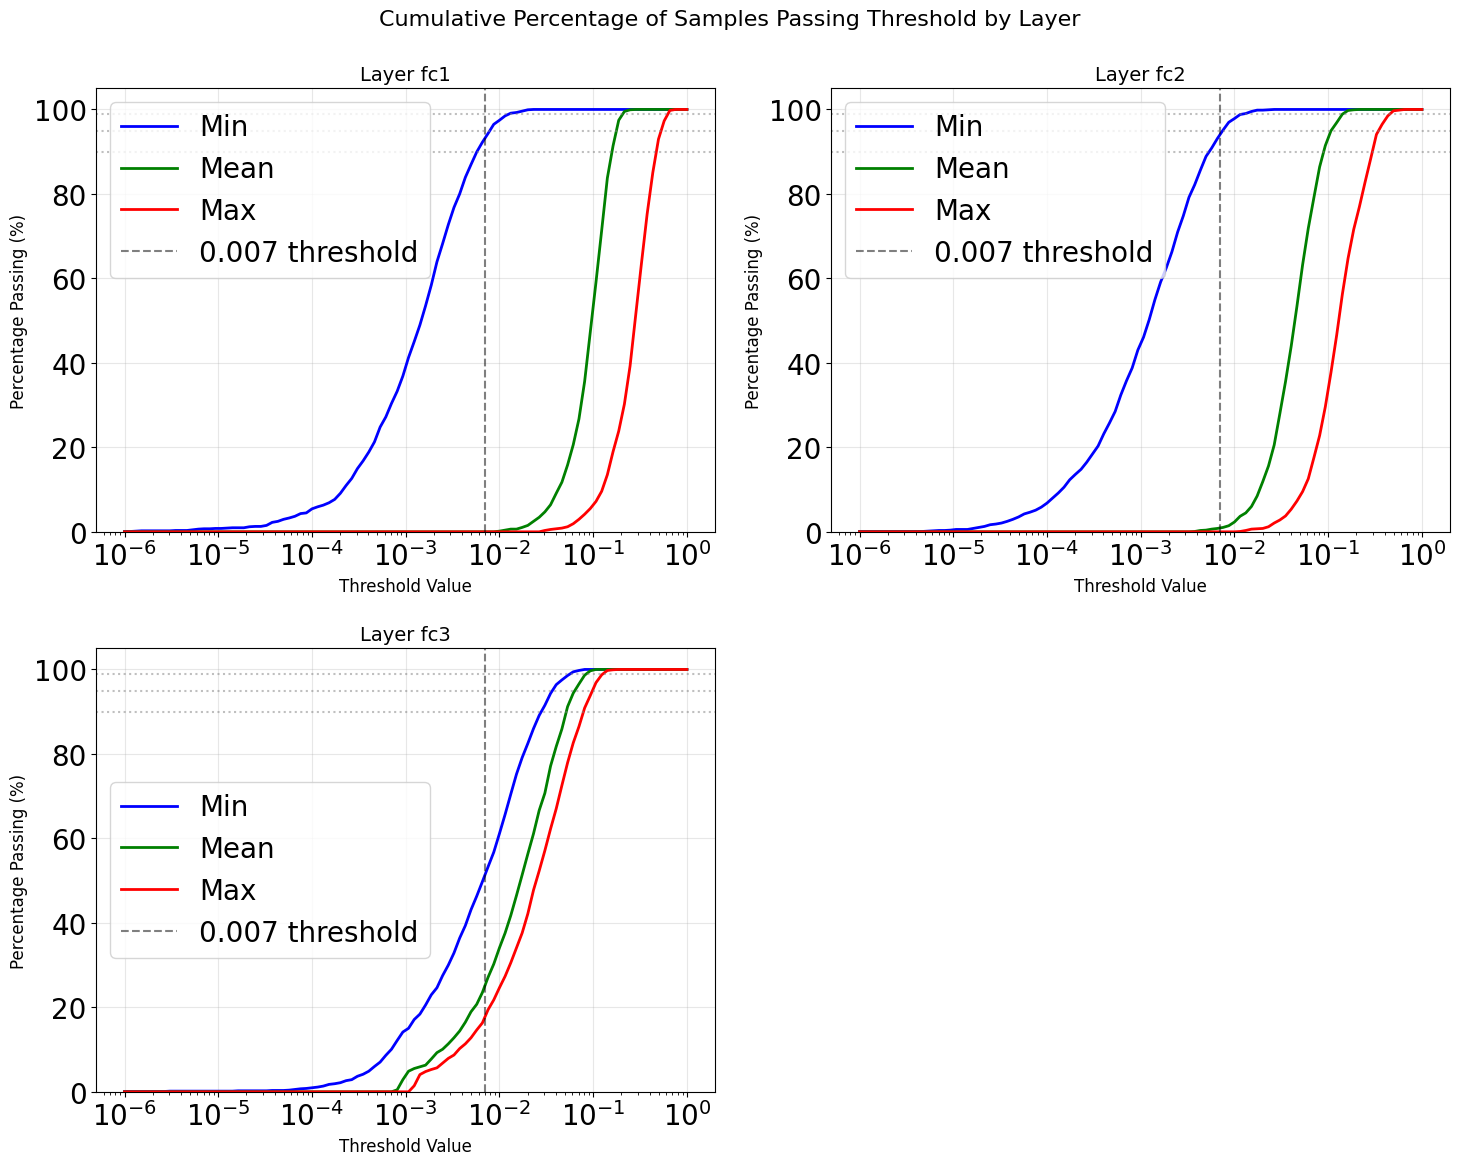


Threshold Analysis Table:
Layer  Threshold Min Pass % Mean Pass % Max Pass %
  fc1     0.0001       5.4%        0.0%       0.0%
  fc1     0.0010      38.8%        0.0%       0.0%
  fc1     0.0100      97.4%        0.2%       0.0%
  fc1     0.1000     100.0%       52.6%       6.5%
  fc2     0.0001       6.8%        0.0%       0.0%
  fc2     0.0010      44.6%        0.0%       0.0%
  fc2     0.0100      97.8%        2.3%       0.0%
  fc2     0.1000     100.0%       93.1%      33.7%
  fc3     0.0001       1.0%        0.0%       0.0%
  fc3     0.0010      14.6%        4.6%       0.0%
  fc3     0.0100      61.1%       34.1%      24.6%
  fc3     0.1000     100.0%       99.8%      95.4%


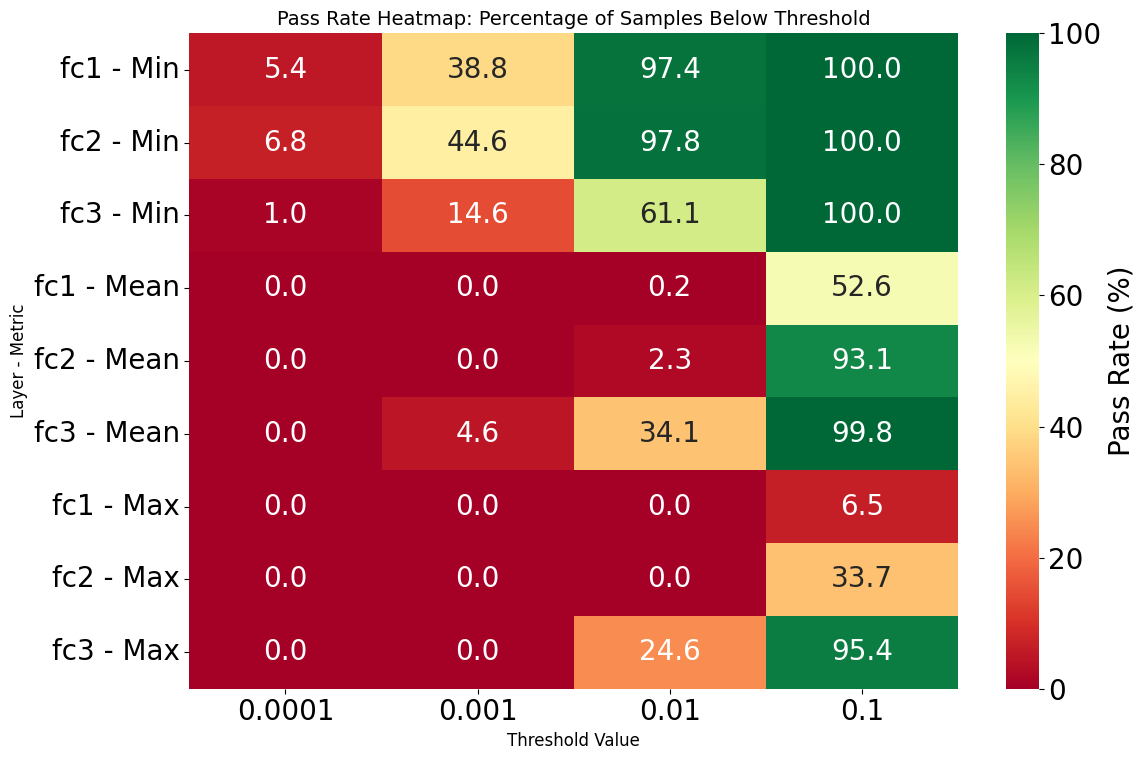

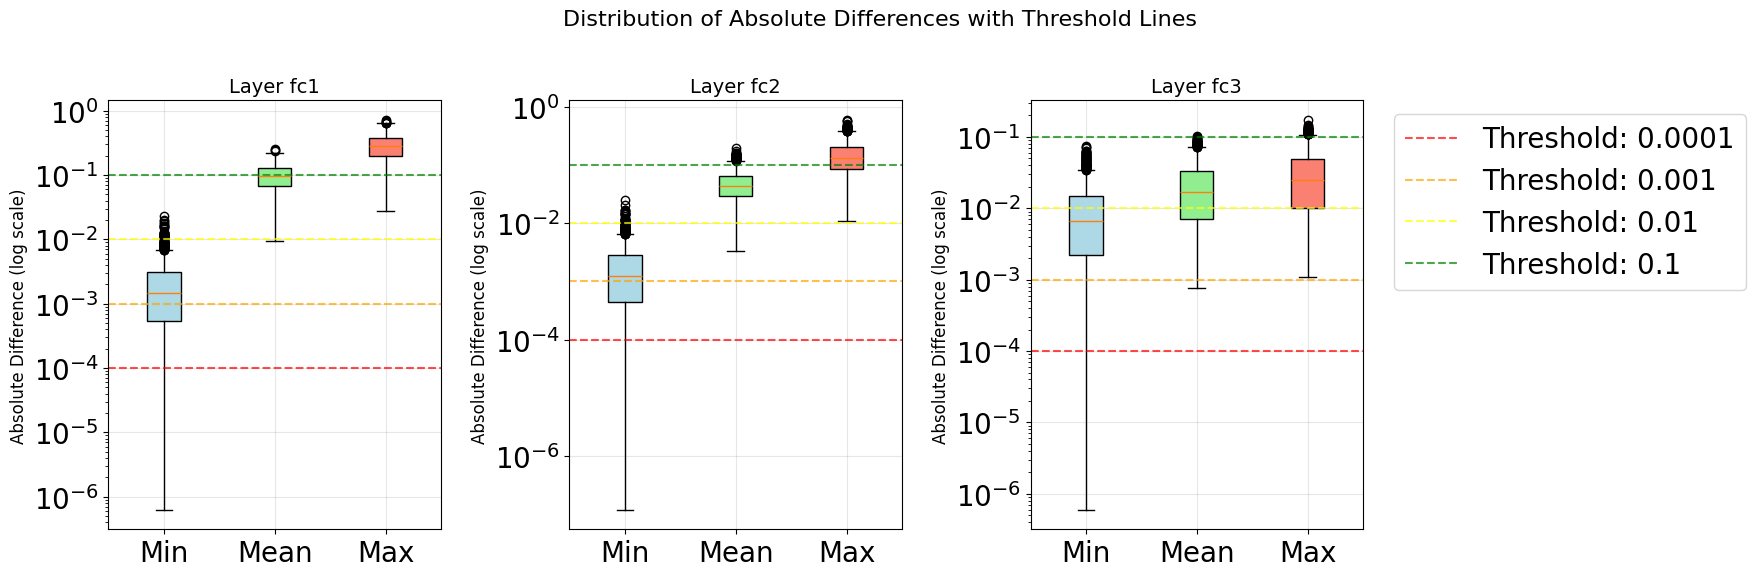


Summary Statistics for Threshold Selection:

Layer fc1:
----------------------------------------

Min Metric:
  Threshold for 90% pass rate: 0.005726
  Threshold for 95% pass rate: 0.007911
  Threshold for 99% pass rate: 0.012624
  Threshold for 99.9% pass rate: 0.019803

Mean Metric:
  Threshold for 90% pass rate: 0.158002
  Threshold for 95% pass rate: 0.173487
  Threshold for 99% pass rate: 0.202362
  Threshold for 99.9% pass rate: 0.243592

Max Metric:
  Threshold for 90% pass rate: 0.471615
  Threshold for 95% pass rate: 0.526249
  Threshold for 99% pass rate: 0.615951
  Threshold for 99.9% pass rate: 0.684130

Layer fc2:
----------------------------------------

Min Metric:
  Threshold for 90% pass rate: 0.005357
  Threshold for 95% pass rate: 0.007485
  Threshold for 99% pass rate: 0.012148
  Threshold for 99.9% pass rate: 0.019762

Mean Metric:
  Threshold for 90% pass rate: 0.089024
  Threshold for 95% pass rate: 0.107324
  Threshold for 99% pass rate: 0.147697
  Threshold fo

In [7]:
# %%
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the results
results = pd.read_csv('activation_diff_results2.csv')

# Define threshold values to test
thresholds = np.logspace(-6, 0, 100)  # From 1e-6 to 1 (0.000001 to 1)

# Create figure for cumulative distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Cumulative Percentage of Samples Passing Threshold by Layer', fontsize=16)

layers = ['fc1', 'fc2', 'fc3']
metrics = ['min_abs_diff', 'mean_abs_diff', 'max_abs_diff']
colors = {'min_abs_diff': 'blue', 'mean_abs_diff': 'green', 'max_abs_diff': 'red'}

# Plot for each layer
for idx, layer in enumerate(layers):
    ax = axes[idx//2, idx%2]
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate percentage passing each threshold
        percentages = []
        for threshold in thresholds:
            passing = np.sum(values <= threshold) / len(values) * 100
            percentages.append(passing)
        
        # Plot cumulative distribution
        ax.semilogx(thresholds, percentages, 
                   label=metric.replace('_abs_diff', '').capitalize(),
                   color=colors[metric], linewidth=2)
    
    # Add reference lines for common thresholds
    ax.axvline(x=0.007, color='black', linestyle='--', alpha=0.5, label='0.007 threshold')
    ax.axhline(y=90, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=95, color='gray', linestyle=':', alpha=0.5)
    ax.axhline(y=99, color='gray', linestyle=':', alpha=0.5)
    
    ax.set_xlabel('Threshold Value', fontsize=12)
    ax.set_ylabel('Percentage Passing (%)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 105)

# Remove empty subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.savefig('cumulative_threshold_distribution3.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create a detailed threshold analysis table
threshold_values = [0.0001, 0.001, 0.01, 0.1]
analysis_results = []

for layer in layers:
    for threshold in threshold_values:
        row = {'Layer': layer, 'Threshold': threshold}
        
        for metric in metrics:
            column = f'{layer}_{metric}'
            values = results[column].values
            passing_percentage = np.sum(values <= threshold) / len(values) * 100
            row[f'{metric.replace("_abs_diff", "").capitalize()} Pass %'] = f'{passing_percentage:.1f}%'
        
        analysis_results.append(row)

# Create DataFrame and display
threshold_df = pd.DataFrame(analysis_results)
print("\nThreshold Analysis Table:")
print("="*80)
print(threshold_df.to_string(index=False))

# Save to CSV
threshold_df.to_csv('threshold_analysis.csv', index=False)

# %%
# Create a heatmap showing pass rates for different thresholds and layers
fig, ax = plt.subplots(figsize=(12, 8))

# Prepare data for heatmap
heatmap_data = []
heatmap_labels = []

for metric in metrics:
    metric_data = []
    for layer in layers:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Calculate pass rates for each threshold
        pass_rates = []
        for threshold in threshold_values:
            passing = np.sum(values <= threshold) / len(values) * 100
            pass_rates.append(passing)
        
        metric_data.append(pass_rates)
    
    heatmap_data.extend(metric_data)
    heatmap_labels.extend([f'{layer} - {metric.replace("_abs_diff", "").capitalize()}' 
                          for layer in layers])

# Create heatmap
heatmap_array = np.array(heatmap_data)
sns.heatmap(heatmap_array, 
            xticklabels=[f'{t}' for t in threshold_values],
            yticklabels=heatmap_labels,
            annot=True, 
            fmt='.1f',
            cmap='RdYlGn',
            cbar_kws={'label': 'Pass Rate (%)'},
            vmin=0, vmax=100)

plt.title('Pass Rate Heatmap: Percentage of Samples Below Threshold', fontsize=14)
plt.xlabel('Threshold Value', fontsize=12)
plt.ylabel('Layer - Metric', fontsize=12)
plt.tight_layout()
plt.savefig('threshold_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Create box plots showing the distribution of differences for each layer
# with threshold lines overlaid
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distribution of Absolute Differences with Threshold Lines', fontsize=16)

for idx, layer in enumerate(layers):
    ax = axes[idx]
    
    # Prepare data for box plot
    data_to_plot = []
    labels_to_plot = []
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        data_to_plot.append(results[column].values)
        labels_to_plot.append(metric.replace('_abs_diff', '').capitalize())
    
    # Create box plot
    bp = ax.boxplot(data_to_plot, labels=labels_to_plot, patch_artist=True)
    
    # Color the boxes
    colors_list = ['lightblue', 'lightgreen', 'salmon']
    for patch, color in zip(bp['boxes'], colors_list):
        patch.set_facecolor(color)
    
    # Add threshold lines
    threshold_colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple']
    for thresh, color in zip(threshold_values, threshold_colors):
        ax.axhline(y=thresh, color=color, linestyle='--', alpha=0.7, 
                  label=f'Threshold: {thresh}')
    
    ax.set_yscale('log')
    ax.set_ylabel('Absolute Difference (log scale)', fontsize=12)
    ax.set_title(f'Layer {layer}', fontsize=14)
    ax.grid(True, alpha=0.3)
    
    # Only show legend on the last subplot
    if idx == 2:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('distribution_with_thresholds.png', dpi=300, bbox_inches='tight')
plt.show()

# %%
# Summary statistics for threshold selection
print("\nSummary Statistics for Threshold Selection:")
print("="*80)

for layer in layers:
    print(f"\nLayer {layer}:")
    print("-"*40)
    
    for metric in metrics:
        column = f'{layer}_{metric}'
        values = results[column].values
        
        # Find threshold for different pass rates
        pass_rates = [90, 95, 99, 99.9]
        print(f"\n{metric.replace('_abs_diff', '').capitalize()} Metric:")
        
        for rate in pass_rates:
            threshold_for_rate = np.percentile(values, rate)
            print(f"  Threshold for {rate}% pass rate: {threshold_for_rate:.6f}")
